<a href="https://colab.research.google.com/github/jatin1bagga/ML-LAB-EVALUATION/blob/main/LAB_EVALUATION_102203713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install catboost

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


**UPLOADING THE DATASET**

In [12]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')
data.head()


Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full (1).csv


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


**PREPARE FEATURES AND TARGET**

In [15]:
# Select target based on roll number last digit
roll_number_last_digit = 4

if roll_number_last_digit in [0, 5]:
    target = 'Target1'
elif roll_number_last_digit in [1, 6]:
    target = 'Target2'
elif roll_number_last_digit in [2, 7]:
    target = 'Target3'
elif roll_number_last_digit in [3, 8]:
    target = 'Target4'
elif roll_number_last_digit in [4, 9]:
    target = 'Target5'
else:
    raise ValueError("Invalid roll number digit")

# Features and target variable
X = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5'])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**TRAIN AND EVALUATE MODELS**

In [22]:
# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, eval_metric='rmse'),
    "CatBoost Regressor": CatBoostRegressor(verbose=0, random_state=42),
}

# Initialize results dictionary
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        results[model_name] = {
            "Mean Squared Error": mse,
            "R2 Score": r2
        }
    except Exception as e:
        results[model_name] = {
            "Error": str(e)
        }

# Apply Clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add clustering results to the dataset
data['Cluster'] = kmeans.labels_

# Display the results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")


Model Performance:

Linear Regression:
  Mean Squared Error: 622.3638513116028
  R2 Score: 0.6943488059944742

Ridge Regressor:
  Mean Squared Error: 622.2201644491148
  R2 Score: 0.694419372530416

Lasso Regressor:
  Mean Squared Error: 616.253287923981
  R2 Score: 0.6973497852311973

Random Forest:
  Mean Squared Error: 455.8003148913001
  R2 Score: 0.776150381836897

K-Nearest Neighbors:
  Mean Squared Error: 2041.9695285466667
  R2 Score: -0.002838489426825408

Support Vector Regressor:
  Mean Squared Error: 2202.182772449907
  R2 Score: -0.08152135185741671

Gradient Boosting:
  Mean Squared Error: 463.92625343538356
  R2 Score: 0.7721596249618305

Decision Tree:
  Mean Squared Error: 818.8607543333334
  R2 Score: 0.5978465542965209

AdaBoost Regressor:
  Mean Squared Error: 801.668235473085
  R2 Score: 0.6062900297755722

XGBoost Regressor:
  Mean Squared Error: 535.4766771075562
  R2 Score: 0.7370202569202711

CatBoost Regressor:
  Mean Squared Error: 453.2868643095643
  R2 Scor

**VISUALIZING WITH GRAPHS**

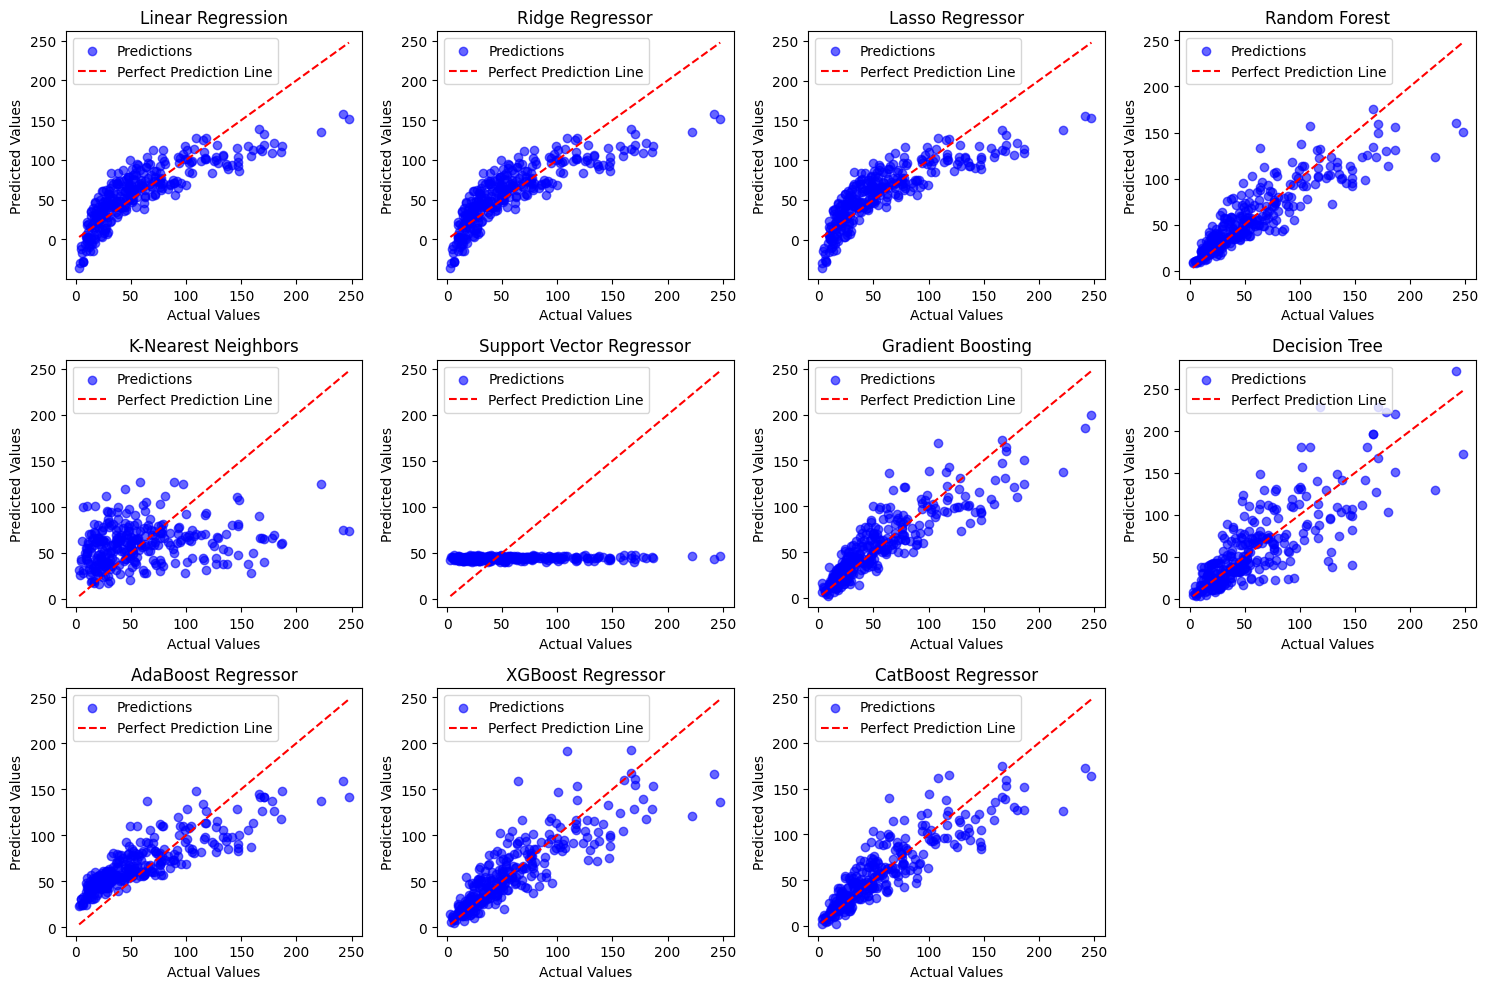

In [25]:
import matplotlib.pyplot as plt

# Initialize the figure for plotting
plt.figure(figsize=(15, 10))

# Loop through each model to plot predictions
for idx, (model_name, metrics) in enumerate(results.items(), 1):
    if "Error" not in metrics:  # Skip models that had errors
        y_pred = models[model_name].predict(X_test)

        # Create a subplot for each model
        plt.subplot(3, 4, idx)  # Adjust layout for a grid of 3 rows and 4 columns

        # Scatter plot of actual vs predicted values
        plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')

        # Plot the line of perfect predictions (y = x)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

        # Add labels and title for each subplot
        plt.title(f'{model_name}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
